# MCMC visualizations

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from results import MCMCResults
import sys
sys.path.insert(0, '/Users/bmmorris/git/friedrich')
from friedrich.lightcurve import hat11_params_morris
transit_params = hat11_params_morris()


from corner import corner

In [38]:
transit_params = hat11_params_morris()

m1 = MCMCResults.from_stsp_local('/Users/bmmorris/git/friedrich/hat11/arctic/first_half_mcmc.txt', 
                                '/Users/bmmorris/git/friedrich/hat11/arctic/first_half.dat', 
                                transit_params=hat11_params_morris())

m2 = MCMCResults.from_stsp_local('/Users/bmmorris/git/friedrich/hat11/arctic/second_half_mcmc.txt', 
                                '/Users/bmmorris/git/friedrich/hat11/arctic/second_half.dat', 
                                transit_params=hat11_params_morris())

In [39]:
# fig, ax = m.light_curve.plot_transit()

Identify the burn-in period

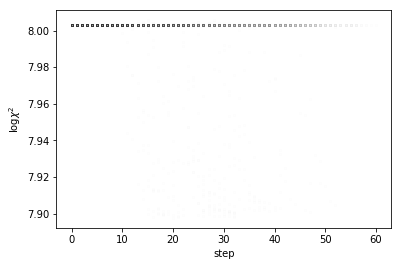

In [40]:
burn_in_step = 2000
for i in range(len(m.chi2_chains)):
    plt.plot(np.log(m.chi2_chains[i]), '.', color='k', alpha=0.005)
plt.xlabel('step')
plt.ylabel('$\log\chi^2$')
#plt.axvline(burn_in_step, color='k', lw=2)
plt.show()

In [41]:
flat_radius = []
flat_phi = []
flat_theta = []
for i in range(len(m.chi2_chains)):
    flat_radius.append(m.radius_chains[i][burn_in_step:, :])
    flat_phi.append(m.phi_chains[i][burn_in_step:, :])
    flat_theta.append(m.theta_chains[i][burn_in_step:, :])
flat_radius = np.vstack(flat_radius)
flat_phi = np.vstack(flat_phi)
flat_theta = np.vstack(flat_theta)

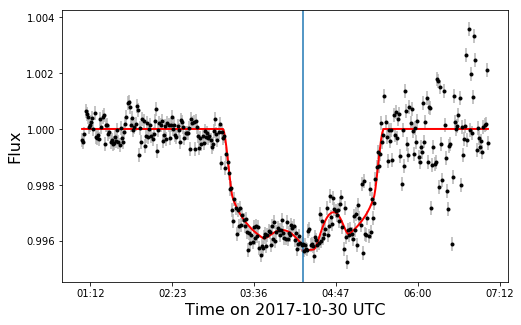

In [42]:
from astropy.time import Time
errorbar_color = '#b3b3b3'
fontsize = 16

fig, ax = plt.subplots(1, figsize=(8, 5))
ax.errorbar(m1.light_curve.kepler_lc.times.plot_date, m1.light_curve.fluxes_kepler,
                m1.light_curve.kepler_lc.errors, fmt='.',
                color='k', ecolor=errorbar_color, capsize=0, label='Kepler')
ax.plot(m1.light_curve.model_lc.times.plot_date, m1.light_curve.fluxes_model, 'r', label='STSP', lw=2)

ax.errorbar(m2.light_curve.kepler_lc.times.plot_date, m2.light_curve.fluxes_kepler,
                m2.light_curve.kepler_lc.errors, fmt='.',
                color='k', ecolor=errorbar_color, capsize=0, label='Kepler')
ax.plot(m2.light_curve.model_lc.times.plot_date, m2.light_curve.fluxes_model, 'r', label='STSP', lw=2)

label_times = Time(ax.get_xticks(), format='plot_date')
ax.set_xticklabels([lt.strftime("%H:%M") for lt in label_times.datetime])

ax.set_xlabel('Time on {0} UTC'.format(label_times[0].datetime.date()),
              fontsize=fontsize)
ax.set_ylabel('Flux', fontsize=fontsize)

ax.axvline(m2.light_curve.kepler_lc.times.plot_date[0])

# ax.set_xlim([m.light_curve.kepler_lc.times.plot_date.min(),
#                 m.light_curve.kepler_lc.times.plot_date.max()])
fig.savefig('plots/transit_{0:03d}.png'.format(m.window_ind), bbox_inches='tight', dpi=200)

In [50]:

!mkdir arctic_outputs

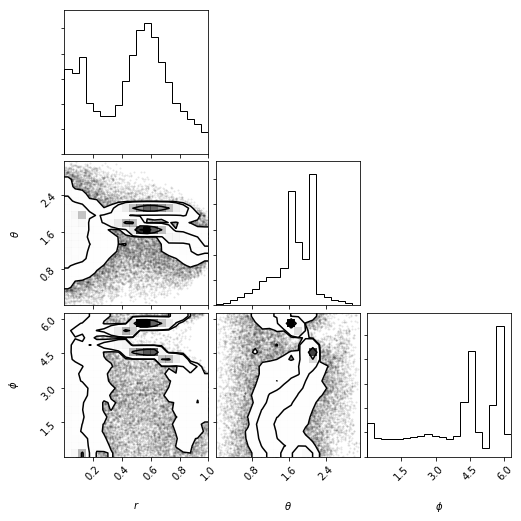

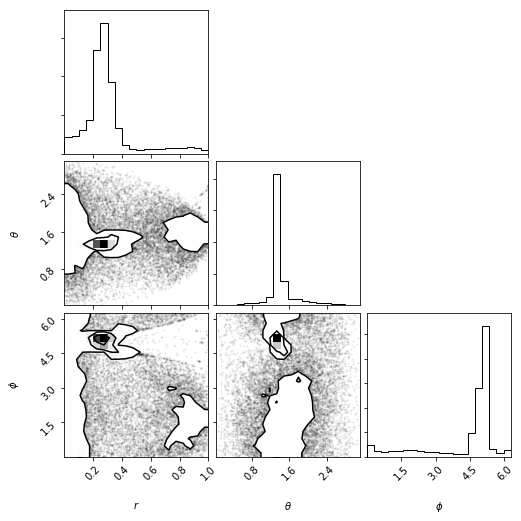

In [54]:

for m in [m1, m2]:
    corner(np.vstack([m.radius.ravel(), m.theta.ravel(), m.phi.ravel()]).T,
           labels=['$r$', r'$\theta$', r'$\phi$'])

In [69]:
attrs = ['radius', 'theta', 'phi']
trans = [lambda r: r, 
         lambda t: np.degrees(np.pi/2 - t), 
         lambda p: np.degrees(p)]

spots_rad = []
spots_deg = []

for m in [m1, m2]:
    measurements_rad = []
    measurements_deg = []
    for attr, transformation in zip(attrs, trans):
        l, med, u = np.percentile(getattr(m, attr).ravel(), [16, 50, 84])
        measurements_rad.append(dict(attr=attr, lower=med-l, best=med, upper=med+l))

        l, med, u = np.percentile(transformation(getattr(m, attr).ravel()), [16, 50, 84])
        measurements_deg.append(dict(attr=attr, lower=med-l, best=med, upper=med+l))
        
    spots_rad.append(measurements_rad)
    spots_deg.append(measurements_deg)

In [72]:
from astropy.table import Table

for measurements_deg in spots_deg:
    print(Table(rows=measurements_deg))

 attr       best          lower         upper     
------ -------------- ------------- --------------
radius       0.512683    0.39675188     0.62861412
 theta -8.37756962121 20.3741626168 -37.1293018592
   phi  253.980330355 163.959035049  344.001625661
 attr       best         lower         upper    
------ ------------- ------------- -------------
radius     0.2676935    0.08163682    0.45375018
 theta 15.4532920643 9.15533271544 21.7512514132
   phi 278.051633779 136.452673172 419.650594387


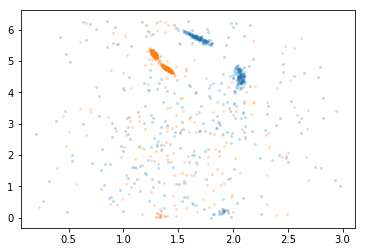

In [85]:
skip = 100
#plt.subplot(111, projection='hammer')
plt.scatter(m1.theta.ravel()[::skip], m1.phi.ravel()[::skip], s=4, alpha=0.2)
plt.scatter(m2.theta.ravel()[::skip], m2.phi.ravel()[::skip], s=4, alpha=0.2)